# Notebook to serve as example of how to use polaraveraging
### created by Mijin & Marina & the CLMM team
################################################################

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import clmm.polaraveraging as pa
import clmm.galaxycluster as gc

### Read in the data (here cosmoDC2)

In [14]:
cosmo_object_type = "ccl"
try:
    import pyccl
except:
    cosmo_object_type = "astropy"
    
if cosmo_object_type == "astropy":
    from astropy.cosmology import FlatLambdaCDM

elif cosmo_object_type == "ccl":
    import pyccl as ccl


In [15]:
#define random cosmology
if cosmo_object_type == "astropy":
    cosmo = FlatLambdaCDM(70., Om0 = 0.3)
    
elif cosmo_object_type == "ccl":
    cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b = 0.05,h = 0.7,n_s = 0.97, sigma8 = 0.8, Omega_k = 0.)

## Load cluster object

In [16]:
#the cluster object contains properties of the lens: ra_l, dec_l, z_l and that of the sources : ra_s, dec_s, e1, e1 
cl = gc.load_cluster('9687686568.p')
print("Cluster info = ID:", cl.unique_id, "; ra:", cl.ra, "; dec:", cl.dec, "; z_l :", cl.z)
print ("The number of source galaxies is :", len(cl.galcat))

Cluster info = ID: 9687686568 ; ra: 62.668306457905786 ; dec: -39.809489570722384 ; z_l : 0.3743791939334802
The number of source galaxies is : 422491


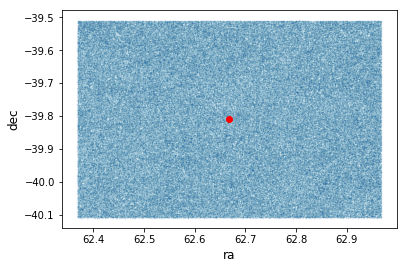

In [17]:
#plot cluster and galaxy positions
plt.scatter(cl.galcat['ra'],cl.galcat['dec'],s= 0.1, alpha=0.1)
plt.plot(cl.ra,cl.dec, 'ro')
plt.ylabel('dec', fontsize = "large")
plt.xlabel('ra',fontsize = "large");

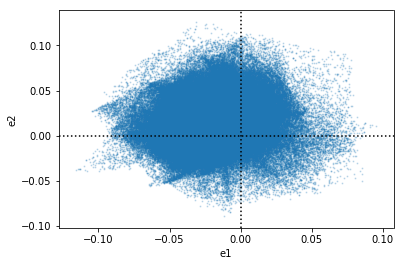

In [30]:
#check the ellipticitie
fig, ax1 = plt.subplots(1,1)

ax1.scatter(cl.galcat['e1'],cl.galcat['e2'], s = 1, alpha = 0.2)
ax1.set_xlabel('e1')
ax1.set_ylabel('e2');
ax1.axvline(0, linestyle = 'dotted', color ='black')
ax1.axhline(0, linestyle = 'dotted', color ='black')

## Compute and plot shear profiles

In [35]:
# calculate angular separation and tangential shear and cross shear for each source galaxy
theta, g_t , g_x = pa.compute_shear(cl, geometry = "flat")


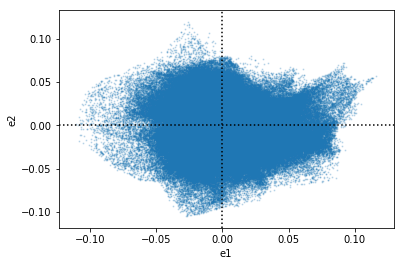

In [36]:
#check the shear, now the shear can be accessed through the cluster object
fig, ax1 = plt.subplots(1,1)

ax1.scatter(cl.galcat['gt'],cl.galcat['gx'], s = 1, alpha = 0.2) 
ax1.set_xlabel('e1')
ax1.set_ylabel('e2');
ax1.axvline(0, linestyle = 'dotted', color ='black')
ax1.axhline(0, linestyle = 'dotted', color ='black')

In [37]:
#compute transversal and cross shear profiles in units defined by user, using defaults binning 
tab = pa.make_shear_profile(cl, "Mpc", bins=None, cosmo = cosmo, cosmo_object_type="ccl")

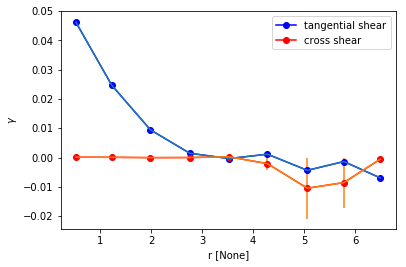

In [39]:
pa.plot_profiles(cl);

In [50]:
#define bins
new_bins = pa.make_bins(500, 5000,10) 

#compute transversal and cross shear profiles in units defined by user, using binning defined by user
new_tab = pa.make_shear_profile(cl, "kpc", bins=new_bins, cosmo = cosmo, cosmo_object_type="ccl")

#BE CAREFULL BECAUSE THIS OVERWRITE THE CLUSTER OBJECT (better implementation will be done latter)

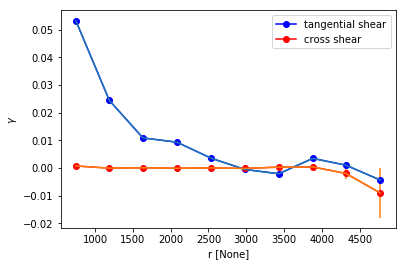

In [51]:
fig, ax = pa.plot_profiles(cl)

## You can also access the profiles quantities and play with them

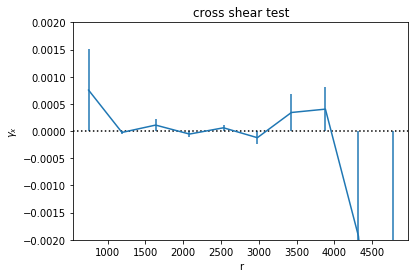

In [52]:
plt.title('cross shear test')
plt.errorbar(new_tab['radius'],new_tab['gx'],new_tab['gx_err'])
plt.title('cross shear test')
plt.ylim(-0.002,0.002)
plt.axhline(0, linestyle = 'dotted', color = 'black')
plt.xlabel("r")
plt.ylabel('$\\gamma_x$');